In [70]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
stations = pd.read_csv('../input/station.csv')
trips = pd.read_csv('../input/trip.csv', error_bad_lines=False)

weathers = pd.read_csv('../input/weather.csv')
#display stations first 5 records
stations.head(5)



b'Skipping line 50794: expected 12 fields, saw 20\n'


,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [71]:
stations.describe()

,lat,long,install_dockcount,current_dockcount
count,58.000000,58.000000,58.000000,58.000000
mean,47.624796,-122.327242,17.586207,16.517241
std,0.019066,0.014957,3.060985,5.117021
min,47.598488,-122.355230,12.000000,0.000000
25%,47.613239,-122.338735,16.000000,16.000000
50%,47.618591,-122.328207,18.000000,18.000000
75%,47.627712,-122.316691,18.000000,18.000000
max,47.666145,-122.284119,30.000000,26.000000


In [72]:
#display trips first 5 records
trips.head(5)



,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [73]:
trips.describe()

,trip_id,tripduration,birthyear
count,286857.000000,286857.000000,181553.000000
mean,112431.968012,1178.295675,1979.759062
std,76565.154943,2038.458947,10.167119
min,431.000000,60.008000,1931.000000
25%,43051.000000,387.924000,1974.000000
50%,103487.000000,624.842000,1983.000000
75%,179545.000000,1118.466000,1987.000000
max,255245.000000,28794.398000,1999.000000


In [74]:
#display weathers first 5 records
weathers.head(5)



,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,10/13/2014,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,10/14/2014,63,59.0,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2,10/15/2014,62,58.0,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25,0.45,Rain
3,10/16/2014,71,61.0,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,-,0.00,Rain
4,10/17/2014,64,60.0,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,-,0.14,Rain


In [75]:
weathers.describe()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Precipitation_In
count,689.000000,688.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.00000,689.000000
mean,64.027576,56.584302,49.454282,48.571843,45.021771,40.873730,84.541364,68.506531,49.973875,30.121742,30.034761,29.940610,9.989840,9.429608,7.245283,11.085631,4.63135,0.105065
std,12.427843,10.408058,9.451437,7.501230,7.914025,8.854608,9.718948,12.701871,15.825701,0.183367,0.197503,0.221803,0.266679,1.174360,3.281278,3.921087,2.78032,0.235644
min,39.000000,33.000000,23.000000,10.000000,4.000000,1.000000,40.000000,24.000000,15.000000,29.470000,29.310000,29.140000,3.000000,1.000000,0.000000,4.000000,0.00000,0.000000
25%,55.000000,48.000000,43.000000,44.000000,41.000000,36.000000,78.000000,60.000000,38.000000,30.010000,29.930000,29.840000,10.000000,9.000000,4.000000,8.000000,3.00000,0.000000
50%,63.000000,56.000000,50.000000,50.000000,46.000000,42.000000,86.000000,70.000000,50.000000,30.120000,30.040000,29.960000,10.000000,10.000000,9.000000,10.000000,4.00000,0.000000
75%,73.000000,65.000000,57.000000,54.000000,51.000000,47.000000,90.000000,79.000000,63.000000,30.240000,30.160000,30.080000,10.000000,10.000000,10.000000,13.000000,6.00000,0.090000
max,98.000000,83.000000,70.000000,77.000000,59.000000,57.000000,100.000000,95.000000,87.000000,30.860000,30.810000,30.750000,10.000000,10.000000,10.000000,30.000000,23.00000,2.200000


In [76]:
#print stations total Record,Attribute 
print("Record,Attribute : ",stations.shape)

Record,Attribute :  (58, 9)


In [77]:
#print trips total Records & Attributes 
print("Record,Attribute : ",trips.shape)

Record,Attribute :  (286857, 12)


In [78]:
#print weathers total Records & Attributes 
print("Record,Attribute : ",weathers.shape)

Record,Attribute :  (689, 21)


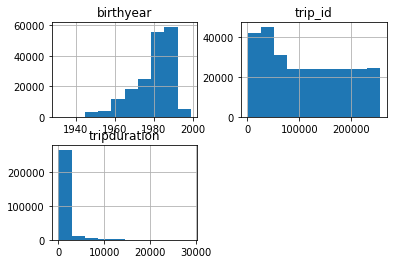

In [79]:
trips.hist()
plt.show()

In [80]:
import matplotlib.pyplot as plt

trips.gender

from collections import defaultdict

# count genders
counts = defaultdict(int)
for e in trips.gender:
    counts[e] += 1

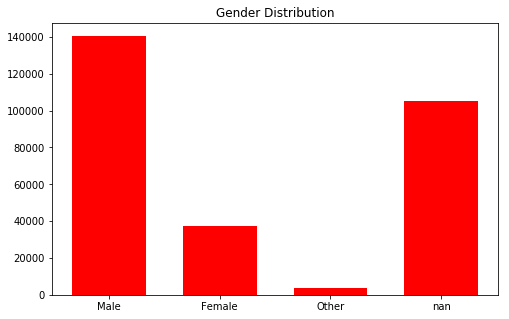

In [81]:
# Gender distribution
y = [e[1] for e in counts.items()][:4]
x = range(len(y))
cols = [e[0] for e in counts.items()][:4]
    
plt.figure(figsize=(8,5))
plt.bar(x, y, color='red', width=1/1.5)
plt.xticks(x, cols)
plt.title('Gender Distribution')
plt.show()

In [82]:
# Bikes with trip duration

#print(trips.birthyear)

bike_stats = defaultdict(int)
dur_stats = defaultdict(float)
by_stats = defaultdict(int)

for t in trips.itertuples():
    bike_stats[t.bikeid] += 1
    dur_stats[t.bikeid] += t.tripduration
    by_stats[str(t.birthyear)] += 1
    #break
    
#for bid in dur_stats.keys():
#    dur_stats[bid] /= bike_stats[bid]
    
    
#for e, k in zip(dur_stats, bike_stats):
    #print(dur_stats[k], " ", bike_stats[e])
    
print(len(by_stats.keys()))
#print(by_stats)

62


1931 1999


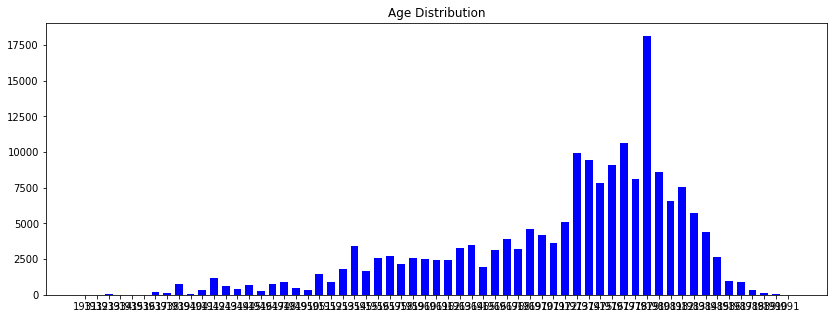

In [83]:
keys = sorted(by_stats.keys())[:-1] # without nan


# Age distribution

y = [by_stats[k] for k in keys]

cols = [by_stats[k] for k in keys]
    
    
minyear = int(min(keys)[:-2])
maxyear = int(max(keys)[:-2])
print(minyear, maxyear)
minamp=0
maxamp=40

x = range(minyear, maxyear, 50)
x = range(minyear, maxyear)

x = x[:61]

# evalutate with histogram
plt.figure(figsize=(14,5))
plt.bar(x, y, color='blue', width=1/1.5)
#plt.hist(cols, 10)
plt.xticks(x, [e for e in x])
#plt.axis([minyear, maxyear, minamp, maxamp])
plt.title('Age Distribution')
plt.show()